In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('bad_pxs_pink.csv', delimiter=",", dtype=int)

FileNotFoundError: bad_pxs_pink.csv not found.

In [614]:
bad_neuron = np.zeros((4, 256), dtype=bool)
bad_tag = np.zeros((4, 2048), dtype=bool)

In [615]:
for core_neuron_synapse_tag in data:
    core = core_neuron_synapse_tag[0]
    neuron = core_neuron_synapse_tag[1]
    tag = core_neuron_synapse_tag[3]
    bad_neuron[core, neuron] = True
    bad_tag[core, tag] = True
good_neuron = 1 - bad_neuron

In [616]:
for i in range(16):
    keep_core = [bool(i & (1<<n)) for n in range(4)]
    kept_cores = np.nonzero(keep_core)[0]
    usable_neuron = [good_neuron[core] + keep_core[core] * bad_neuron[core] for core in range(4)]
    usable_tag = np.prod([np.logical_not(keep_core[core] * bad_tag[core]) for core in range(4)], axis=0)
    print(f"keep bad neurons on cores {kept_cores}: {np.sum(usable_neuron)} neurons x {np.sum(usable_tag)} tags")

keep bad neurons on cores []: 509 neurons x 2048 tags
keep bad neurons on cores [0]: 509 neurons x 2048 tags
keep bad neurons on cores [1]: 765 neurons x 1825 tags
keep bad neurons on cores [0 1]: 765 neurons x 1825 tags
keep bad neurons on cores [2]: 765 neurons x 514 tags
keep bad neurons on cores [0 2]: 765 neurons x 514 tags
keep bad neurons on cores [1 2]: 1021 neurons x 514 tags
keep bad neurons on cores [0 1 2]: 1021 neurons x 514 tags
keep bad neurons on cores [3]: 512 neurons x 2045 tags
keep bad neurons on cores [0 3]: 512 neurons x 2045 tags
keep bad neurons on cores [1 3]: 768 neurons x 1822 tags
keep bad neurons on cores [0 1 3]: 768 neurons x 1822 tags
keep bad neurons on cores [2 3]: 768 neurons x 511 tags
keep bad neurons on cores [0 2 3]: 768 neurons x 511 tags
keep bad neurons on cores [1 2 3]: 1024 neurons x 511 tags
keep bad neurons on cores [0 1 2 3]: 1024 neurons x 511 tags


In [617]:
data_cams = np.loadtxt('bad_cams_pink.csv', delimiter=",", dtype=int)

In [618]:
cams_matrix = np.zeros((4, 256, 64))
for core_neuron_synapse_tag in data_cams:
    cams_matrix[core_neuron_synapse_tag[0], core_neuron_synapse_tag[1], core_neuron_synapse_tag[2]] += 1

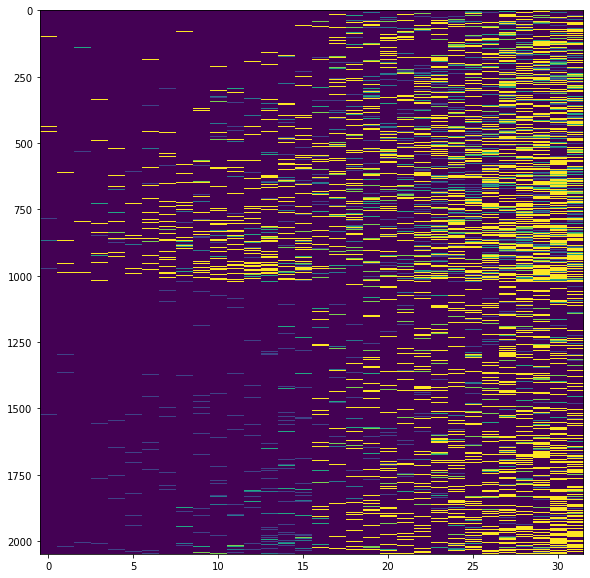

In [620]:
plt.figure(figsize=(10, 10))
plt.imshow(np.concatenate([np.concatenate([np.transpose(np.reshape(np.reshape(
    cams_matrix[core_row + core_col * 2], (16, 16, 64)), (16, 16*64))) for core_col in range(2)], axis=0)
                           for core_row in range(2)], axis=1),
           aspect=1/64,interpolation='none')
plt.show()

(array([13186.,   324.,   155.,   163.,  2556.]),
 array([0, 1, 2, 3, 4, 5]),
 <BarContainer object of 5 artists>)

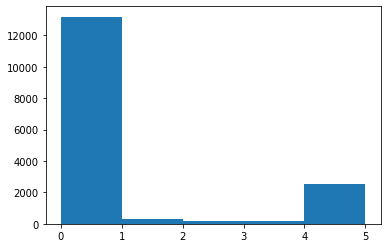

In [624]:
plt.hist(cams_matrix[3].flatten().astype('int'), bins=range(6))

(array([54., 51., 29., 31., 21., 14., 11.,  8.,  4.,  4., 10.,  5.,  2.,
         2.,  1.,  2.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <BarContainer object of 64 artists>)

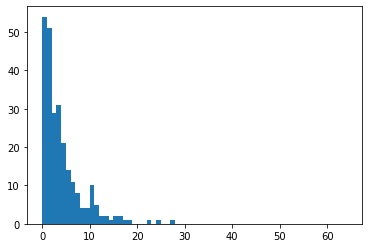

In [628]:
plt.hist(np.sum((cams_matrix[0]/5).astype('int'), axis=1), bins=range(65))